## CREATED BY HCY 20200724
## 多分类电影海报识别竞赛

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from mlxtend.plotting import plot_confusion_matrix


import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam


## 配置gpu使用，防止gpu内存不够用报错
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda5.2\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm   ## 进度条包

In [3]:
# ex：
for char in tqdm(["a", "b", "c", "d"]):
    #do something
    pass

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


In [4]:
data = pd.read_csv('./Movies-Poster_Dataset-master/train.csv')
print(data.shape)
data.head()

(7254, 27)


,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
data[data['Id'] == 'tt0084058']

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
98,tt0084058,"['Drama', 'Romance']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [6]:
img_width = 350
img_heigh = 350
batch_size = 200
epoches = 5

In [7]:
path_file = './Movies-Poster_Dataset-master/Images/'

In [8]:
import glob
from tensorflow.python.platform import gfile
import os
import sys

In [9]:
# img_width = 350
# img_height = 350
# extensions = ['jpg']
# file_list = []
# dir_name = os.path.basename(path_file)
# for extension in extensions:
#     file_glob = os.path.join(path_file,dir_name, '*.'+ extension)
#     file_list.extend(glob.glob(file_glob))

In [10]:
# for i in tqdm(range(data.shape[0])):
#     path = path_file + data['Id'][i] + '.jpg'

In [11]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = './Movies-Poster_Dataset-master/Images/' + data['Id'][i] + '.jpg'
    img = load_img(path, target_size=(img_width, img_height, 3))
    img = img_to_array(img)
    img = img / 255.
    X.append(img)
    

X = np.array(X)

100%|█████████████████████████████████████████████████████████████████████████████| 7254/7254 [00:16<00:00, 452.21it/s]


In [12]:
import gc
del img
gc.collect()

22

In [13]:
y = data.drop(['Id', 'Genre'], axis=1)
y = y.to_numpy()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
del X
del y
gc.collect()

8813

## BULD CNN MODEL

In [16]:
print(X_train.shape, X_test.shape)

(5803, 350, 350, 3) (1451, 350, 350, 3)


In [18]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))


model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.4))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))  ##不推荐用softmax这里，用sigmoid最好？

In [ ]:
# model.summary()

In [19]:
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=90, epochs=epoches)

Train on 5803 samples, validate on 1451 samples
Epoch 1/5
5803/5803 [==============================] - 39s 7ms/sample - loss: 0.6314 - accuracy: 0.7046 - val_loss: 6.8610 - val_accuracy: 0.7598
Epoch 2/5
5803/5803 [==============================] - 36s 6ms/sample - loss: 0.6041 - accuracy: 0.7324 - val_loss: 6.9495 - val_accuracy: 0.7634
Epoch 3/5
5803/5803 [==============================] - 36s 6ms/sample - loss: 0.5775 - accuracy: 0.7637 - val_loss: 6.6516 - val_accuracy: 0.7730
Epoch 4/5
5803/5803 [==============================] - 36s 6ms/sample - loss: 0.5539 - accuracy: 0.7899 - val_loss: 5.7741 - val_accuracy: 0.7722
Epoch 5/5
5803/5803 [==============================] - 36s 6ms/sample - loss: 0.5288 - accuracy: 0.8163 - val_loss: 4.8455 - val_accuracy: 0.7706


In [22]:
def plot_learningCureve(history):
    epoch_range = range(1,6)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

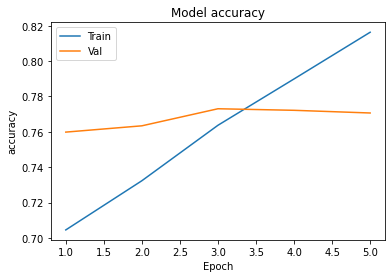

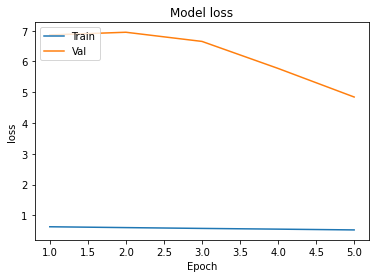

In [29]:
plot_learningCureve(history)

In [45]:
classes = data.columns[2:]
print(classes)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


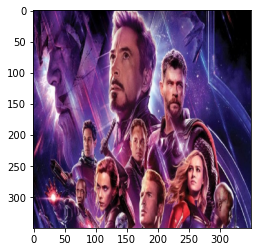

In [38]:
img = load_img('./Movies-Poster_Dataset-master/endgame.jpg', target_size=(img_height, img_width, 3))
plt.imshow(img)
img = img_to_array(img)
img = img / 255.
img = img.reshape(1, img_width, img_height, 3)
y_prob = model.predict(img)


In [42]:
y_prob

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.9999932 , 0.        , 0.        , 0.        , 0.99531496,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ]],
      dtype=float32)

In [56]:
classes[np.argsort(y_prob[0][:-4:-1])]

Index(['Action', 'Adventure', 'Animation'], dtype='object')

In [47]:
a = np.array([1,2,3,4,5,6,7,8,9,10])
a[:-4:-1]

array([10,  9,  8])

In [83]:
a = np.random.randint(36, size=(4, 3 ,3))

In [89]:
a

array([[[31, 19, 12],
        [28,  4, 16],
        [26,  1,  3]],

       [[ 4,  5,  2],
        [ 7, 24,  3],
        [11, 30, 28]],

       [[27, 34, 33],
        [18, 33,  0],
        [11,  3,  3]],

       [[ 8, 35,  4],
        [ 6, 12, 27],
        [ 3, 33, 20]]])

In [88]:
a.sum(axis=0)

array([[70, 93, 51],
       [59, 73, 46],
       [51, 67, 54]])

In [86]:
a.sum(axis=1)

array([[85, 24, 31],
       [22, 59, 33],
       [56, 70, 36],
       [17, 80, 51]])

In [87]:
a.sum(axis=-1)

array([[62, 48, 30],
       [11, 34, 69],
       [94, 51, 17],
       [47, 45, 56]])